In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import cmocean.cm as cm 
from IPython.display import display, Math, Latex
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools
import xarray as xr

%matplotlib inline

In [4]:

fname = '/ocean/ssahu/CANYONS/Results/ORCINUS_RESULTS/full_config_30_days/WCVI_1h_20160402_20160509_grid_T.nc'

gridT = xr.open_dataset(fname)

In [19]:
ssh = gridT['sossheig'][:]
lats = gridT['nav_lat'][:]
lons = gridT['nav_lon'][:]
sal = gridT['vosaline'][:]
zlevels = gridT['deptht'][:]

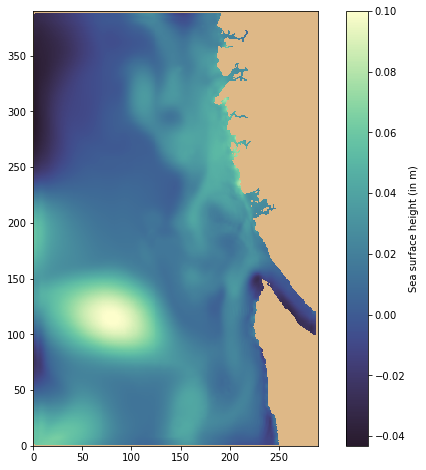

In [8]:
ssh0 = np.ma.masked_values(ssh[0], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh0)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh0, cmap=cmap, vmax = 0.1)
cbar = fig.colorbar(mesh)
cbar.set_label('Sea surface height (in m)')

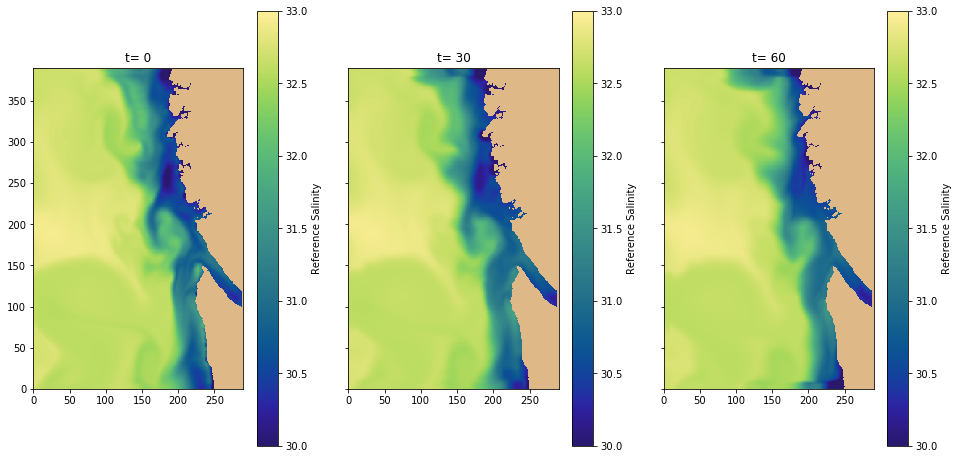

In [10]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 30, 60)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Reference Salinity')

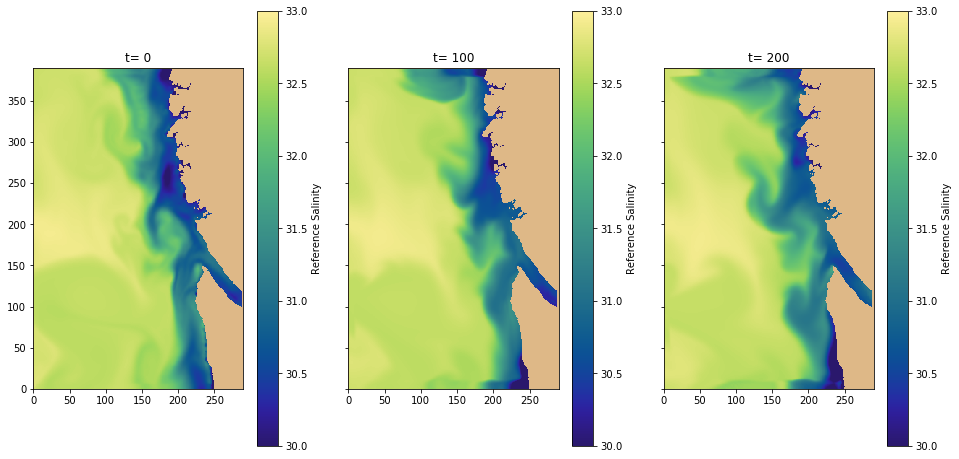

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 100, 200)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Reference Salinity')

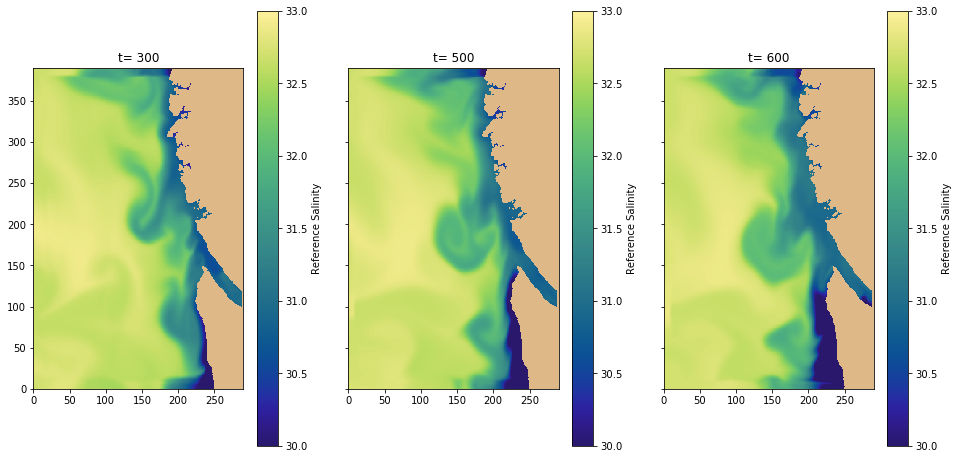

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

time_steps = (300, 500, 600)
for ax, t in zip(axs, time_steps):
    sal_t = np.ma.masked_equal(sal[t,0,...], 0)
    cmap = plt.get_cmap(cm.haline)
    cmap.set_bad('burlywood')
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(sal_t, cmap=cmap, vmin = 30, vmax =33)
    viz_tools.plot_land_mask(ax, bathy, color='burlywood')
    ax.set_title('t= {0}'.format(t))
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label('Reference Salinity')

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


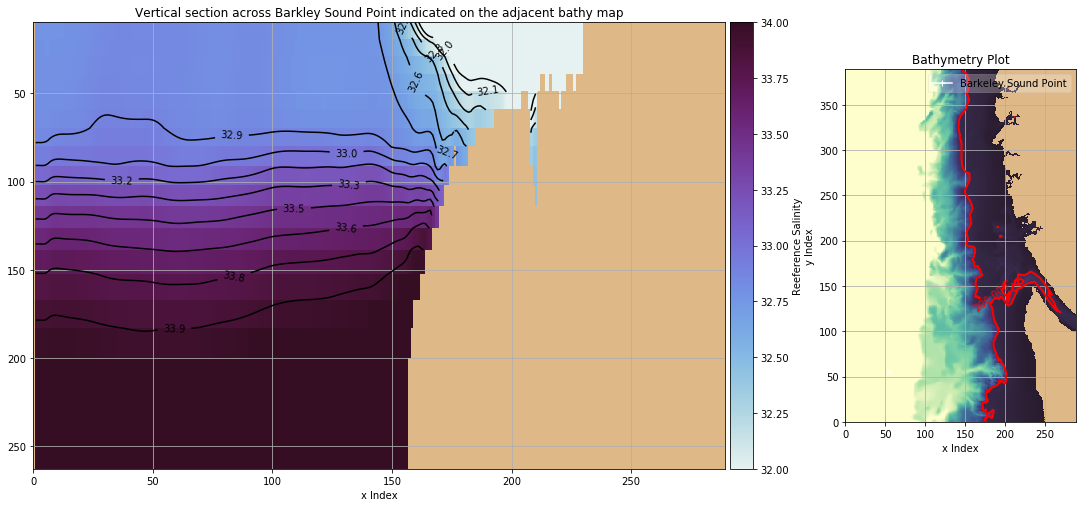

In [22]:
bathy = '/ocean/ssahu/CANYONS/wcvi/grid/bathy_meter.nc'

bathymetry = nc.Dataset(bathy).variables['Bathymetry'][:]

# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

x_slice = np.arange(0,290)
y_slice = np.arange(0,390)

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_slice, y_slice, bathymetry, cmap=cmap)
axr.plot(
    x_slice[55], y_slice[55],
    linestyle='-', marker='+', color='white',
    label='Barkeley Sound Point',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_slice,y_slice,bathymetry, levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 47 
cmap = plt.get_cmap(cm.dense)
cmap.set_bad(land_colour)
sal_0 = sal[t, :20, :,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_slice, zlevels[:20])
mesh = axl.pcolormesh(x_slice, zlevels[:20], sal_tzyx[:20,225,x_slice], cmap=cmap, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Reeference Salinity')
clines = axl.contour(x_slice, zlevels[:20], sal_tzyx[:20,225,x_slice], np.arange(32, 34, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound Point indicated on the adjacent bathy map')

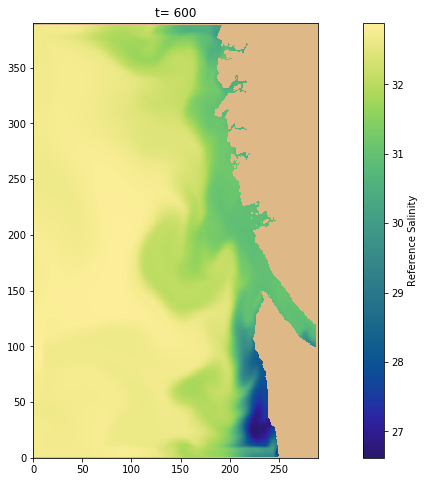

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharey=True)


sal_t = np.ma.masked_equal(sal[600,0,...], 0)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal_t, cmap=cmap)#, vmin = 30, vmax =33)
viz_tools.plot_land_mask(ax, bathy, color='burlywood')
ax.set_title('t= 600')
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Reference Salinity')

In [30]:
np.array(sal[600,0,40,230])

array(26.99989128112793)